### Getting started with Backtrader
This is part of the KE5207 project assignment.

### Setup the trading rules and platform here

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as pylab
import csv

import pytz
import random
from os import listdir
from os.path import isfile, join

In [5]:

def getFilesAndNames(dirpath):
    ''' Return only the Futures files from the directory'''
    onlyfiles = []
    for f in listdir(dirpath):
        fullpath = join(dirpath, f)
        if isfile(fullpath) and f.startswith("F"):
            onlyfiles.append((fullpath,f.split(".")[0]))
    #print (onlyfiles)
    return onlyfiles

#getFilesAndNames(os.getcwd() + "\\Data\\")

In [6]:


# setup data
def setup_multiple_data(bt, cerebro):
    import os
    modpath = os.getcwd() + "\\Data\\Test\\"
    datalist = getFilesAndNames(modpath)
    
    
    #start_test = datetime.datetime(2011, 1, 3)
    #end_test = datetime.datetime(2014, 1, 1)
    #start_trade = datetime.datetime(2014, 1, 2)
    #end_trade = datetime.datetime(2016, 12, 30)
    
    for i in range(len(datalist)):
        df = pd.read_csv(datalist[i][0])
        start_test = datetime.datetime.strptime(df['DateTime'][0], "%d/%m/%Y %H:%M")
        end_test = datetime.datetime.strptime(df['DateTime'][len(df)-1], "%d/%m/%Y %H:%M")
        
        # setup the data path
        #datafile = "FCPO_6_years_NUS.xlsx"
        data = bt.feeds.GenericCSVData(
            dataname=datalist[i][0],
            fromdate= start_test,
            todate= end_test,
            nullvalue=0.0,
            dtformat=('%d/%m/%Y %H:%M'),
            tz = pytz.timezone('Asia/Jakarta'),
            datetime=2,
            high=4,
            low=5,
            open=3,
            close=6,
            volume=7
        )
        # Add the Data Feed to Cerebro
        cerebro.adddata(data, name=datalist[i][1])
        
        #print ("Added data source {}".format(datalist[i][0]))
        #if testmode:
        return 

In [7]:
def setup_platform(cerebro):
    ''' Setup the rules of engagement'''
    # Set our desired cash start, using MYR
    cerebro.broker.setcash(10000.0)

    # Set the commission - max of 0.2% or RM30
    comminfo = CommInfo_Fut_Perc_Mult(
        commission=0.002#,  # 0.2%
        #mult=1,
    #    margin = 0
    )

    cerebro.broker.addcommissioninfo(comminfo)
    #cerebro.broker.setcommission(commission=0.001)

    
    # Add a FixedSize sizer according to the stake
    #cerebro.addsizer(bt.sizers.FixedSize, stake=1)

In [8]:
class CommInfo_Fut_Perc_Mult(bt.CommInfoBase):
    #params = (
    #  ('stocklike', False)#,  # Futures
      #('commtype', bt.CommInfoBase.COMM_PERC),  # Apply % Commission
      # ('percabs', False),  # pass perc as xx% which is the default
    #)

    def _getcommission(self, size, price, pseudoexec):
        return max(30, size * price * self.p.commission * self.p.mult)

In [9]:
def setup_plot():
    pylab.rcParams['figure.figsize'] = 45, 30  # that's default image size for this interactive session
    pylab.rcParams['font.family'] = 'sans-serif'
    pylab.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
    pylab.rcParams['font.serif'] = ['Bitstream Vera Sans']
    pylab.rcParams["font.size"] = "200"

    #plotter = Plotter()
    #back_tester.plot(plotter=plotter)

    #plor the result
    #plt.figure(figsize=(15,20))
    #cerebro.plot(style='candlestick', iplot=False)
    #imagefile = "test_strategy.png"
    #modpath = os.getcwd() + "\\"
    ##datapath = os.path.join(modpath, imagefile)
    #pylab.savefig(datapath)


### Visualise the data

In [10]:
import os
modpath = os.getcwd() + "\\Data\\Test\\"
datalist = getFilesAndNames(modpath)

df = pd.read_csv(datalist[1][0])


In [11]:
# Sort DataFrame by date
df = df.sort_values('DateTime')

# Double check the result
df.head()

,Date,Time,DateTime,Open,High,Low,Close,Volume
1893,20121001,10:30:00,01/10/2012 10:30,2508,2516,2508,2516,6
1894,20121001,10:31:00,01/10/2012 10:31,2516,2516,2516,2516,4
1895,20121001,10:32:00,01/10/2012 10:32,2513,2513,2510,2510,31
1896,20121001,10:33:00,01/10/2012 10:33,2510,2510,2507,2507,39
1897,20121001,10:34:00,01/10/2012 10:34,2506,2506,2504,2504,30


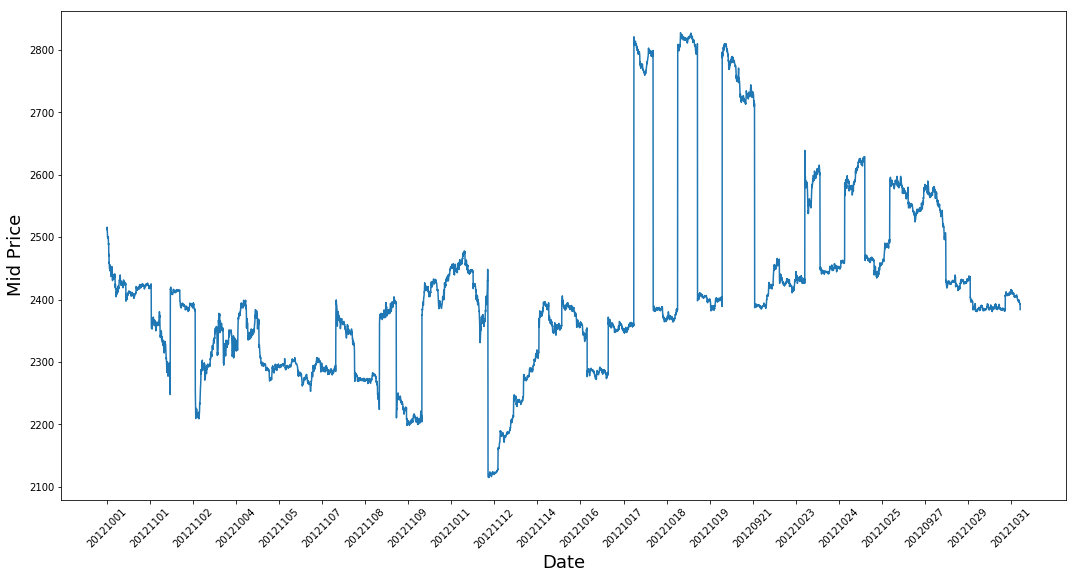

In [12]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

### Helper functions can be found here

In [13]:
# https://stackoverflow.com/questions/9489078/how-to-split-a-huge-csv-file-based-on-content-of-first-column
import csv
from itertools import groupby

def split_excel_to_csv():
    datafile = 'FCPO_6_years_NUS.csv'
    modpath = os.getcwd() + "\\Data\\"
    datapath = os.path.join(modpath, datafile)
    csv_header = 'Date,Time,DateTime,Open,High,Low,Close,Volume'
    reader = csv.reader(open(datapath))
    next(reader)
    for key, rows in groupby(reader,lambda row: row[0]):
        if key[-1] in ["1","2","3"]:
            outputpath = os.path.join(modpath+"//Test//","{}.csv".format(key))
        else:
            outputpath = os.path.join(modpath+"//Prod//","{}.csv".format(key))
        with open(outputpath, "w") as output:
            output.write(csv_header + "\n")
            for row in rows:
                row.pop(0) # remove the key
                output.write(",".join(row) + "\n")
                
#split_excel_to_csv()

In [14]:
def writeToCsv(filepath, data):
    ''' Generate a csv file which contains the seven fuzzy extent centroid value'''
    with open(filepath,'w') as f:
        #print ("max {} and min {}".format(max(data), min(data)))
        f.write(",".join(map(str,splitDataToSevenExtents(data))))
        
def loadFromCsv(filepath):
    ''' Load the previous stored fuzzy extent values from csv file'''
    with open(filepath, 'rt') as f:
        reader = csv.reader(f)
        return list(map(float,[r for r in reader][0]))

In [15]:
def splitDataToSevenExtents(data):
    ''' Split a list of array into seven parts meant for the fuzzy extent later
        Calculate the central point and also the std dev '''
    # get the max and min
    max_point = max(data)
    # split the positive into three parts
    min_point = min(data)
    # split the negative into three parts
    pos_part = 0
    if max_point > 0:
        pos_part = round(max_point / 3, 2)
    neg_part = 0
    if min_point < 0:
        neg_part = round(min_point / 3, 2)
    
    return [neg_part * 3,
            neg_part * 2,
            neg_part,
            0,
            pos_part,
            pos_part * 2,
            pos_part * 3]

In [27]:
m = np.array([10, 20, 50, 100, 150, 200])
print (m[m>10])

[ 20  50 100 150 200]


In [30]:
def generateRandomRule():
    ''' generate one random rule'''
    inds = ['sma','ama','tma','tpma']
    m = np.array([10, 20, 50, 100, 150, 200])
    n = np.array([3,5,10,15,20])
    exts = ['VL','EL','L','M','H','VH','EH']
    neg = np.arange(-1,0,0.1)
    med = np.arange(-1,1,0.1)
    pos = np.arange(0,1,0.1)

    sel_ext = random.choice(exts)
    rec = 0
    if sel_ext in ['VL','EL','L']:
        rec = random.choice(neg)
    elif sel_ext in ['M']:
        rec = random.choice(med)
    else:
        rec = random.choice(pos)
        
    fast = random.choice(n)
    slow = random.choice(m[m>fast])

    return [random.choice(inds), fast, slow, sel_ext, rec]
    
#print (generateRandomRule())

def generateRandomIndividual():
    rules = []
    total_rules = 10
    for i in range(0,total_rules):
        rules.append(generateRandomRule())
    
    return np.array(rules)

#print (generateRandomIndividual())

### Setting up Custom indicators
Besides the standard simple moving average, we also need to setup:
1. Adaptive moving average
1. Typical Price moving average
1. Triangular moving average

### Defining strategies here

In [17]:
class TypicalPriceMovingAverage(bt.Indicator):
    lines = ('tpma',)
    params = (('period', 20),)

    def __init__(self):
        self.addminperiod(self.params.period)

    def next(self):
        dataline = self.data.get(size=self.p.period)
        datasum = max(dataline) + min(dataline) + dataline[-1]
        self.lines.tpma[0] = datasum/3

In [39]:
class FMASCrossOver(bt.Strategy):
    """A simple moving average crossover strategy; crossing of a fast and slow moving average generates buy/sell
       signals"""
    params = {"inds":["sma"],
              "fasts": [1], 
              "slows": [10],                 
              "exts":["VH"],
              "recs":[0.6],
              "filePath": "",
              "bSkipTrade": True}

    def getFuzzyPosition(self, ind_type, slow, fast, diffval):
        modpath = os.getcwd() + "\\Data\\"
        filename = "{}_{}_{}.csv".format(ind_type, fast, slow)
        filepath = os.path.join(modpath +"\\Model\\", filename)
        bShowPlot = False
        
        farr = loadFromCsv(filepath)
        
        fuzsys, fe, rec = buildFuzzySystem(farr, bShowPlot=bShowPlot)
        mf, fe = getFuzzyOutput(fuzsys, fe, rec, diffval, bShowPlot=bShowPlot)
        return mf, fe
    
    def setIndicator(self, ma_type, period_val, ind_type, d):
        plottitle = "SlowMA: "
        #period_val = self.params.slow
        #ind_type = self.p.ind
        if ma_type == "fast":
            plottitle = "FastMA: "
         #   period_val = self.params.fast
            
        datafeed = self.getdatabyname(d)
        
        print ("ind:{}, ma type:{}, period:{}".format(ind_type, ma_type, period_val))
        ma = None
        if ind_type == 'sma':
            ma = bt.indicators.SMA(datafeed,      # The symbol for the moving average
                                   period=period_val,    # Fast moving average
                                   plotname=plottitle + d)

        elif ind_type == "ama":
            #ma = bt.indicators.KAMA(datafeed,      # The symbol for the moving average
            #                        period=period_val,    # Fast moving average
            #                        plotname=plottitle + d)
            ma = bt.talib.KAMA(datafeed, timeperiod=period_val, 
                               plotname=plottitle + d)


        elif ind_type == "tma":
            ma = bt.talib.TRIMA(datafeed,      # The symbol for the moving average
                               timeperiod=period_val,    # Fast moving average
                               plotname=plottitle + d)
        elif ind_type == "tpma":
            ma = TypicalPriceMovingAverage(datafeed,      # The symbol for the moving average
                                           period=period_val,    # Fast moving average
                                           plotname=plottitle + d)
        return ma

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        """Initialize the strategy"""
 
        self.fastma = dict()
        self.slowma = dict()
        self.regime = dict()
        self.extent = dict()
        self.recommend = dict()
        
        # only use to build the fuzzy extent files
        self.madiff = dict()
        
        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None
 
        self._addobserver(True, bt.observers.BuySell)    # CAUTION: Abuse of the method, I will change this in future code (see: https://community.backtrader.com/topic/473/plotting-just-the-account-s-value/4)
 
  #      if self.params.optim:    # Use a tuple during optimization
 #           self.params.fast, self.params.slow = self.params.optim_fs    # fast and slow replaced by tuple's contents
 
    
        #check that the number of parameters for fast, slow and ind type are of the same length
        if len(self.p.fasts) != len(self.p.slows):
            raise ValueError("Number of parameters for the fast and slow is not of the same length.")
        elif len(self.p.inds) != len(self.p.fasts):
            raise ValueError("Number of parameters for the indicator type and fast / slow is not of the same length.")
        
        #if self.params.fast > self.params.slow:
        #    raise ValueError(
         #       "A SMAC strategy cannot have the fast moving average's window be " + \
          #       "greater than the slow moving average window.")
        
 
        for d in self.getdatanames():
 
            key = ""
            for i in range(len(self.p.inds)):
                # The moving averages
                key = "{}_{}_{}_{}".format(d,self.p.inds[i],self.p.slows[i],self.p.fasts[i])
                self.fastma[key] = self.setIndicator("fast",int(self.p.fasts[i]), self.p.inds[i],d)
                self.slowma[key] = self.setIndicator("slow",int(self.p.slows[i]), self.p.inds[i],d)

                #ma_type, period_val, ind_type, d
                
                # Get the regime
                self.regime[key] = self.fastma[key] - self.slowma[key]    # Positive when bullish
                self.extent[key] = self.p.exts[i]
                self.recommend[key] = float(self.p.recs[i])
            
    def next(self):
        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return
        
        """Define what will be done in a single step, including creating and closing trades"""
        for i, d in enumerate(self.datas):
            dt, dn = self.datetime.date(), d._name
            pos = self.getposition(d).size
            
            key = ""
            marr = []
            ratings = []
            #loop through the rules and calculate the overall rating for the individual
            for i in range(len(self.p.inds)):
                key = "{}_{}_{}_{}".format(dn,self.p.inds[i],self.p.slows[i],self.p.fasts[i])
            
                if self.p.bSkipTrade:
                    marr.append(self.regime[key][0])
                    #self.log("Regime: {}".format(self.regime[dn][0]))

                    break
                    
            self.madiff[key] = marr                    
                
            # first get the ma difference ind_type, fast, slow
            dn, ind, slow, fast = key.split("_")
            mf,fe = self.getFuzzyPosition(ind, slow, fast, self.regime[key][0])
            # get the fe and recommended value based on past data
            # check if the fe are the same 
            rating = 0
            if(fe == self.extent[key]):
                # if it is then calculate the overall rating per rule
                rating = mf * self.recommend[key]
                ratings.append(rating)
        
            avg_rating = np.average(ratings)
            #print ("Average rating:{}".format(avg_rating))
        
            if pos == 0:    # Are we out of the market?

                if avg_rating > 0:    # A buy signal
                    # BUY, BUY, BUY!!! (with default parameters)
                    self.log('%s BUY CREATE, %.2f with volume %.2f' % (dn, d.high[0], d.volume[0]), 
                             dt=d.datetime.date(0))

                    # Keep track of the created order to avoid a 2nd order
                    self.order = self.buy(data=d, price=d.high[0], size = (self.stats.broker.cash[0]/d.high[0])*avg_rating)

                elif avg_rating < 0:    # A sell signal
                        # SELL, SELL, SELL!!! (with all possible default parameters)
                        self.log('%s SELL CREATE, %.2f with volume %.2f' % (dn, d.low[0], d.volume[0]), 
                                 dt=d.datetime.date(0))

                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.sell(data=d, price=d.low[0], size = (self.stats.broker.cash[0]/d.low[0])*avg_rating)
                
                    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, Size: %.2f, Price: %.2f, Cost: %.2f, Comm %.2f, Portfolio Value: %.2f, Cash: %.2f' %
                    (order.executed.size,
                     order.executed.price,
                     order.executed.value,
                     order.executed.comm,
                     self.stats.broker.value[0],
                     self.stats.broker.cash[0]))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            elif order.issell():
                self.log('SELL EXECUTED, Size: %.2f, Price: %.2f, Cost: %.2f, Comm %.2f, Portfolio Value: %.2f, Cash: %.2f' %
                         (order.executed.size,
                          order.executed.price,
                          order.executed.value,
                          order.executed.comm,
                         self.stats.broker.value[0],
                         self.stats.broker.cash[0]))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None
    
    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))
        
    def stop(self):
        if self.p.bSkipTrade:
            #check if the path exists
            #if (os.path.exists(self.params.writePath)):
            writeToCsv(self.params.writePath, self.madiff_arr)
            #self.log(len(self.madiff_arr))

### And the paper chase begins here

In [19]:
#from report import Cerebro

#if __name__ == '__main__':
def main(inds, fasts, slows, exts, recs):
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    
    # get path
    modpath = os.getcwd() + "\\Data\\"
    #filename = "{}_{}_{}.csv".format(ind_type, fast, slow)
    #filepath = os.path.join(modpath +"\\Model\\", filename)

    bSkipTrade = True
    
    # Add a strategy
    cerebro.addstrategy(FMASCrossOver, inds=inds, fasts=fasts, slows=slows, 
                        exts=exts, recs = recs, bSkipTrade=bSkipTrade)

    # Create a Data Feed
    setup_multiple_data(bt, cerebro)

    setup_platform(cerebro)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Plot the result
    if not bSkipTrade:
        imagefile = "graph{}_{}_{}.png".format(ind_type, fast, slow)
        datapath = os.path.join(modpath+"\\Graph\\", imagefile)
        cerebro.plot(style='candlestick', iplot=False, ytight=True, subplot=False, path=datapath)

### Building the fuzzy extents
Use the old data output the values to an external file to that the fuzzy extents can be build later.

In [20]:
#!/usr/bin/env python
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

def buildFuzzySystem(arr, bShowPlot=False):
    '''Given an array of value, build and return a fuzzy system'''
    # New Antecedent/Consequent objects hold universe variables and membership functions

    fe = ctrl.Antecedent(np.arange(arr[0], arr[-2], 0.1), 'fe')
    rec= ctrl.Consequent(np.arange(-1, 1, 0.1), 'rec')

    rec["Neg"] = fuzz.pimf(rec.universe, -1, -1, -1, 0)
    rec["Med"] = fuzz.pimf(rec.universe, -1, 0, 0, 1)
    rec["Pos"] = fuzz.pimf(rec.universe, 0, 1, 1, 1)
    
    fe["EL"] = fuzz.pimf(fe.universe, arr[0], arr[0], arr[0],arr[1])
    fe["VL"] = fuzz.pimf(fe.universe, arr[0], arr[1], arr[1], arr[2])
    fe["L"] = fuzz.pimf(fe.universe, arr[1], arr[2], arr[2], arr[3])
    fe["M"] = fuzz.pimf(fe.universe, arr[2], arr[3], arr[3], arr[4])
    fe["H"] = fuzz.pimf(fe.universe, arr[3], arr[4], arr[4], arr[5])
    fe["VH"] = fuzz.pimf(fe.universe, arr[4], arr[5], arr[5], arr[6])
    fe["EH"] = fuzz.pimf(fe.universe, arr[5], arr[6], arr[6], arr[6])

    if bShowPlot:
        rec.view()
        fe.view()

    #build the rules
    rule1 = ctrl.Rule(fe["EL"] | fe["L"] | fe["VL"], rec["Neg"])
    rule2 = ctrl.Rule(fe["M"], rec["Med"])
    rule3 = ctrl.Rule(fe["EH"] | fe["H"] | fe["VH"], rec["Pos"])
    
    ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3])
    ctrl_instance = ctrl.ControlSystemSimulation(ctrl_sys)
    
    return ctrl_instance, fe, rec

In [21]:
def getFuzzyOutput(ctrl_instance, fe, rec, input_val, bShowPlot=False):
    ''' Given the fuzzy system and the input value, compute and return the mf and the fuzzy extent'''
    ctrl_instance.input['fe'] = input_val
    ctrl_instance.compute()
    #rec.view(sim=ctrl_instance)
    if bShowPlot:
        rec.view(sim=ctrl_instance)
        fe.view(sim=ctrl_instance)
    
    #print (ctrl_instance.print_state())
    #print (ctrl_instance.input['fe'])
    
    ants = ctrl_instance.get_antecedents()
    
    return (ctrl_instance.output['rec'], max(ants, key=ants.get))

### Build the stored fuzzy extent models
Loop through the available moving averages type and m & n to get the central points stored as file.

In [38]:
inds = ['tma']
m= [20]
n = [10] #[3,5,10,15,20] #skip 1

params = generateRandomIndividual()
print(params[:,0],params[:,1], params[:,2], params[:,3], params[:,4])
#main(params[:,0],params[:,1], params[:,2], params[:,3], params[:,4])
main(inds,n,m,["VH"],[0.6])

['tpma' 'tma' 'ama' 'ama' 'ama' 'tma' 'sma' 'sma' 'ama' 'ama'] ['3' '20' '15' '3' '10' '15' '3' '5' '20' '20'] ['20' '50' '20' '200' '100' '100' '100' '20' '200' '100'] ['VL' 'L' 'M' 'L' 'EL' 'L' 'EH' 'VH' 'H' 'H'] ['-0.1000000000000002' '-0.20000000000000018' '-0.6000000000000001' '-0.8'
 '-0.6000000000000001' '-0.6000000000000001' '0.2' '0.1' '0.4' '0.8']
Starting Portfolio Value: 10000.00
ind:tma, ma type:fast, period:10
ind:tma, ma type:slow, period:20
2011-10-01, FCPO0112 BUY CREATE, 2895.00 with volume 8.00
2011-10-01, BUY EXECUTED, Size: 1.30, Price: 2890.00, Cost: 3756.85, Comm 30.00, Portfolio Value: 10000.00, Cash: 10000.00


AttributeError: 'function' object has no attribute 'universe'